# Objective



The objective of this project is to build a predictive model to estimate housing prices based on various features such as
house area, number of bedrooms, furnished status, proximity to main road, etc. The dataset presents challenges due to strong
multicollinearity among the features.

# Installation of the required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# loading dataset

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lab = LabelEncoder()

In [8]:
df['mainroad'] = lab.fit_transform(df['mainroad'])
df['guestroom'] = lab.fit_transform(df['guestroom'])
df['basement'] = lab.fit_transform(df['basement'])
df['prefarea'] = lab.fit_transform(df['prefarea'])
df['furnishingstatus'] = lab.fit_transform(df['furnishingstatus'])
df['hotwaterheating'] = lab.fit_transform(df['hotwaterheating'])
df['airconditioning'] = lab.fit_transform(df['airconditioning'])


In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


# checking null values

In [10]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

 we can see that there is no null values so we will go for the Exploratory Data Analysis

# Exploratory Data Analysis

refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from
data it is essential to examine all your variables.

we can infer from above describe function thatthe dataset has a house where the house has 6 bedrooms , seems to be a massive
house and would be interesting to know more about it as we progress.
Maximum square feet is 16200 where as the minimum is 1650. we can see that the data is distributed.

Let’s see which is most common bedroom number. You may wonder why is it important ? Let’s look at this problem from a
builder’s perspective, sometimes it’s important for a builder to see which is the highest selling house type which enables
the builder to make house based on that. Here in India , for a good locality a builder opts to make houses which are more
than 3 bedrooms which attracts the higher middle class and upper class
section of the society.

<Axes: >

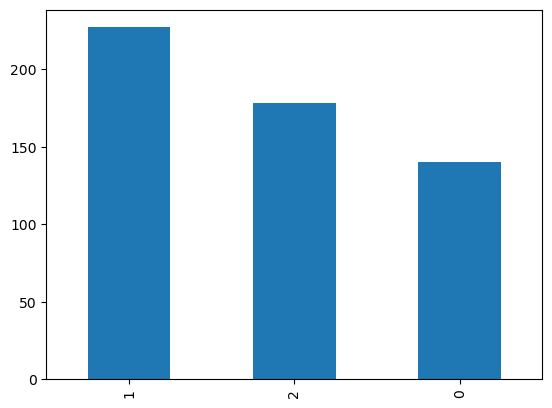

In [11]:
df['furnishingstatus'].value_counts().plot(kind='bar')

from above we can see that house which are furnished will get more price.

<Axes: >

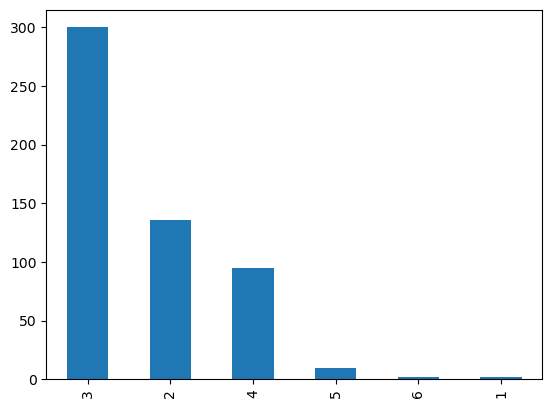

In [12]:
df['bedrooms'].value_counts().plot(kind='bar')

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 2 bedroom. So how is it useful ? 
For a builder having this data , He can make a new building with more 2 and 3 bedroom’s to attract more buyers.

Text(0.5, 1.0, 'Hot water heating')

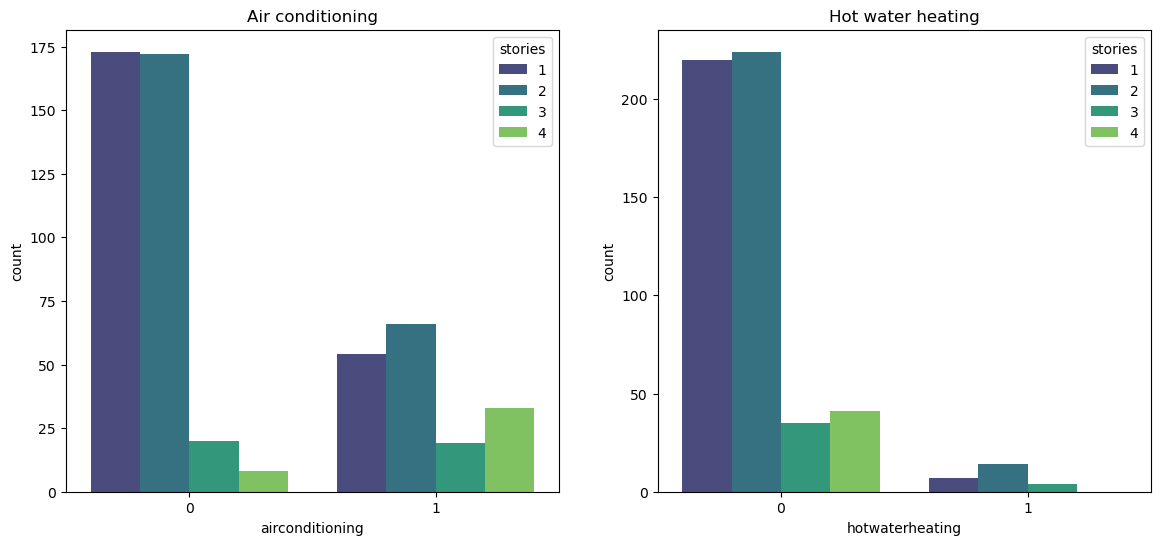

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the first countplot on the first subplot (axs[0])
sns.countplot(x=df["airconditioning"], hue=df["stories"], palette="viridis", ax=axs[0])

# Plot the second countplot on the second subplot (axs[1])
sns.countplot(x=df["hotwaterheating"], hue=df["stories"], palette="viridis", ax=axs[1])

# Optionally, add titles to the subplots
axs[0].set_title("Air conditioning")
axs[1].set_title("Hot water heating")

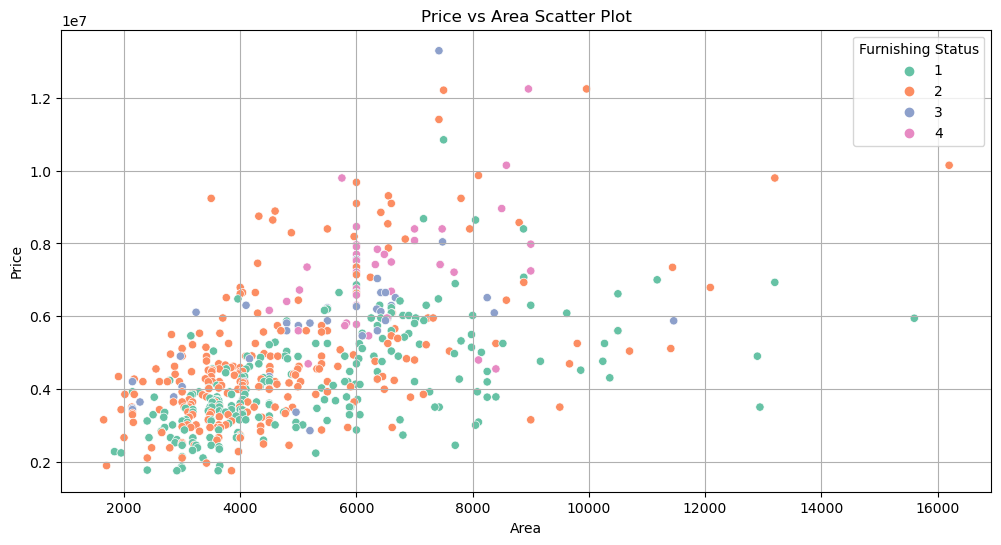

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', hue='stories', data=df,palette="Set2")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')
plt.grid(True)
plt.show()

The plot that we used above is called scatter plot , scatter plot helps us to see how our data points are scattered and are
usually used for two variables. From the first figure we can see that more the living area , more the price though data is
concentrated towards a particular price zone , but from the figure we can see that the data points seem to be in linear
direction. Thanks to scatter plot we can also see some irregularities that the house with the highest square feet was sold for
very less , maybe there is another factor or probably the data must be wrong.

Text(0.5, 1.0, 'price vs mainroad')

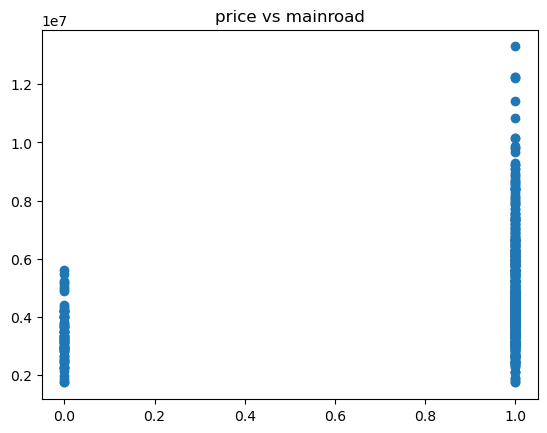

In [15]:
plt.scatter(df.mainroad,df.price)
plt.title("price vs mainroad")

Text(0.5, 1.0, 'price vs furnishingstatus')

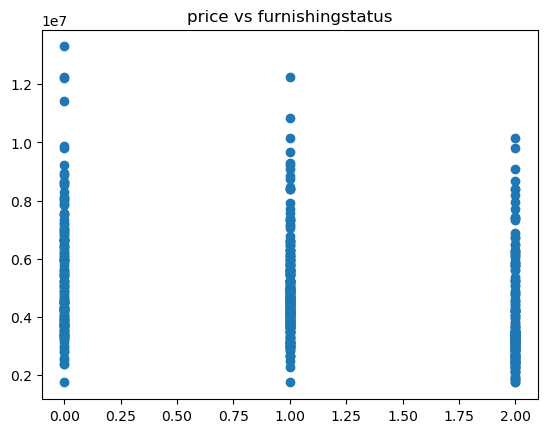

In [16]:
plt.scatter(df.furnishingstatus,df.price)
plt.title("price vs furnishingstatus")

we can see from the above plot that price is high if the house is furnished and semi-furnished as compared to non-furnished.

Text(0.5, 1.0, 'price vs bedrooms')

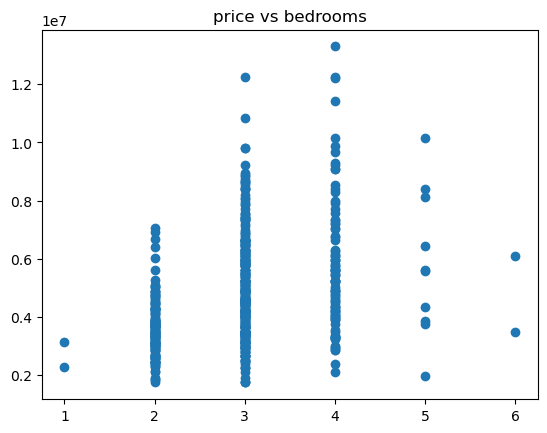

In [18]:
plt.scatter(df.bedrooms,df.price)
plt.title("price vs bedrooms")

Text(0.5, 1.0, 'price vs basement')

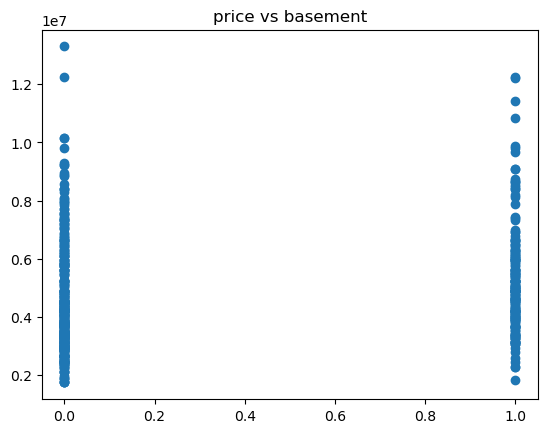

In [19]:
plt.scatter(df.basement,df.price)
plt.title("price vs basement")

<Axes: >

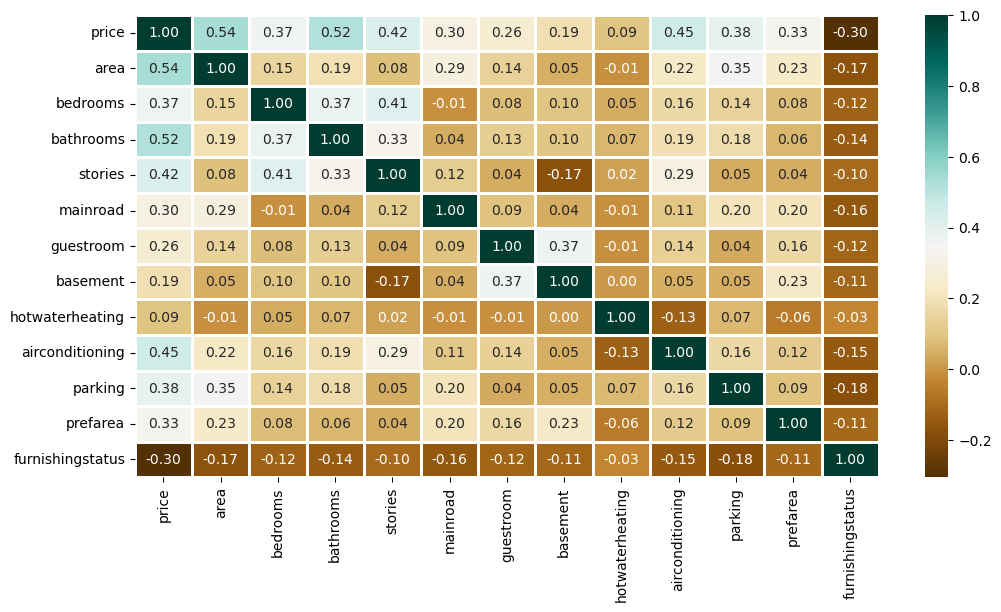

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: >

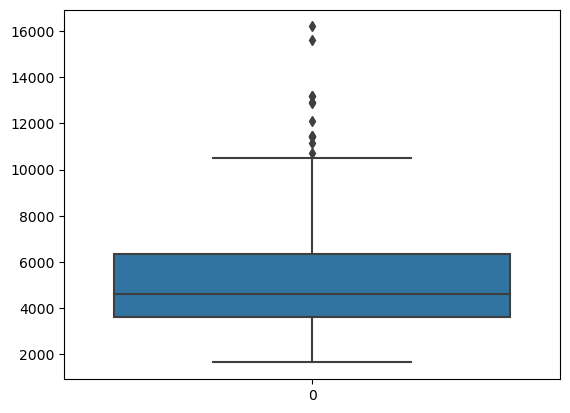

In [21]:
sns.boxplot(df['area'])


In [22]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

IQR, Q1, Q3

(2310000.0, 3430000.0, 5740000.0)

In [23]:
upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR

upper_bound, lower_bound
df = df[(df['price'] <= upper_bound) & (df['price'] >=  lower_bound)]

accuracy gets lower when outlier detection is used on "area"



In [24]:
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

IQR_area, Q1_area, Q3_area

(2764.0, 3596.0, 6360.0)

In [25]:
upper_bound_area = Q3_area + 3 * IQR_area
lower_bound_area = Q1_area - 3 * IQR_area

upper_bound_area, lower_bound_area
df = df[(df['area'] <= upper_bound_area) & (df['area'] >=  lower_bound_area)]

# Feature Selection

In [26]:
x=df.drop(['price',],axis=1)
y=df['price']

In [27]:
print(x.shape,y.shape)

(542, 12) (542,)


# Data Spliting

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_auc_score, RocCurveDisplay

In [29]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

# Model Selection

In [30]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [31]:
regression.score(x_train,y_train)

0.6763054624405367

In [32]:
Lr_reg_pred =regression.predict(x_test)

In [33]:
# The coefficients
print('Coefficients: \n', regression.coef_)

Coefficients: 
 [ 2.40261094e+02  1.64956350e+05  9.60325878e+05  3.68586864e+05
  4.48717011e+05  3.64978025e+05  2.74453107e+05  7.18657445e+05
  9.06494254e+05  2.45503548e+05  5.33635900e+05 -2.16793179e+05]


In [34]:
# The mean squared error
#print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, Lr_reg_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test, Lr_reg_pred))

Coefficient of determination: 0.68


In [35]:
from sklearn import ensemble

In [36]:
clf=ensemble.GradientBoostingRegressor(n_estimators=100,max_depth=2,min_samples_split=2,learning_rate=0.1)

In [37]:
clf.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=2)

In [38]:
clf.score(x_train,y_train)

0.774100080607647

In [39]:
y_pred_GB = clf.predict(x_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test, y_pred_GB))


Coefficient of determination: 0.64


In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_GB))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_GB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GB)))

MAE: 814031.921228162
MSE: 1341084636107.46
RMSE: 1158052.0869578621


# Model Training

# Model Evaluation

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
 

In [42]:
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2]
}

In [43]:
# Create a LinearRegression object
model = LinearRegression()

In [44]:
# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [45]:
# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1, 1, 2]},
             scoring='neg_mean_squared_error')

In [46]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1}


In [47]:
# Evaluate the model with best parameters on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


# Model Testing

In [48]:
best_model.score(x_test,y_test)

0.6754086853376737

In [49]:
clf.score(x_test,y_test)

0.640077013272571

linear regression is best model.

So we conclude that the system that  we  proposed solves most of the problems that we have with the existing system.
After  training  and  testing  of  datasets  with  all models,  the  linear regression  performs better than gradient boost 
regressor  model.  The  highest  accuracy score is achieved by the linear regression. So, we suggest that this regression
model be used for future  house  price predictions.  Therefore,  the outcome of  our  project  will  be  predicting  house
prices  with  good  accuracy  which  can  help  the customer as well as developer.